In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
jet = plt.cm.jet
colors = [jet(x) for x in np.linspace(1, 0.4, 256)]
green_to_red = LinearSegmentedColormap.from_list('GreenToRed', colors, N=256)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 24
plt.rcParams['mathtext.fontset'] = 'cm'

In [13]:
def decompose_trajectory_fixed(vt_sample, fixed_speed = 15):
    mean_speed = fixed_speed/3600
    vt_sample['average_speed'] = mean_speed
    initial_space = vt_sample['space'].max()
    vt_sample['nominal_space'] = initial_space - mean_speed * (vt_sample['time'] - vt_sample['time'].min())
    vt_sample['oscillation_space'] =  - vt_sample['space'] + vt_sample['nominal_space']
    return vt_sample

In [14]:
vt_all = pd.read_csv('../demo_data/vt_lane_1.csv')

In [15]:
for v_id, traj in vt_all.groupby('v_id'):
    if v_id == 400:
        vt_sample = traj.copy()
        # plt.scatter(traj['time'], traj['space'], c=traj['speed'], cmap=green_to_red, vmin=0, vmax = 80, s=1, alpha=0.5)
        break
vt_sample = decompose_trajectory_fixed(vt_sample, fixed_speed=15)
# to find local minimum and maximum
tail_peaks, _ = find_peaks(vt_sample['oscillation_space'])
front_peaks, _ = find_peaks(-vt_sample['oscillation_space'])

In [16]:
vt_sample

,time,space,speed,v_id,average_speed,nominal_space,oscillation_space
109824,2000.0,62.600000,60.831329,400,0.004167,62.600000,0.000000
109825,2001.0,62.583102,60.831329,400,0.004167,62.595833,0.012731
109826,2002.0,62.566205,60.830084,400,0.004167,62.591667,0.025462
109827,2003.0,62.549285,60.912348,400,0.004167,62.587500,0.038215
109828,2004.0,62.532340,61.001200,400,0.004167,62.583333,0.050993
...,...,...,...,...,...,...,...
110258,2434.0,58.745935,43.171118,400,0.004167,60.791667,2.045732
110259,2435.0,58.733892,43.353314,400,0.004167,60.787500,2.053608
110260,2436.0,58.721737,43.756219,400,0.004167,60.783333,2.061596
110261,2437.0,58.709460,44.197719,400,0.004167,60.779167,2.069706


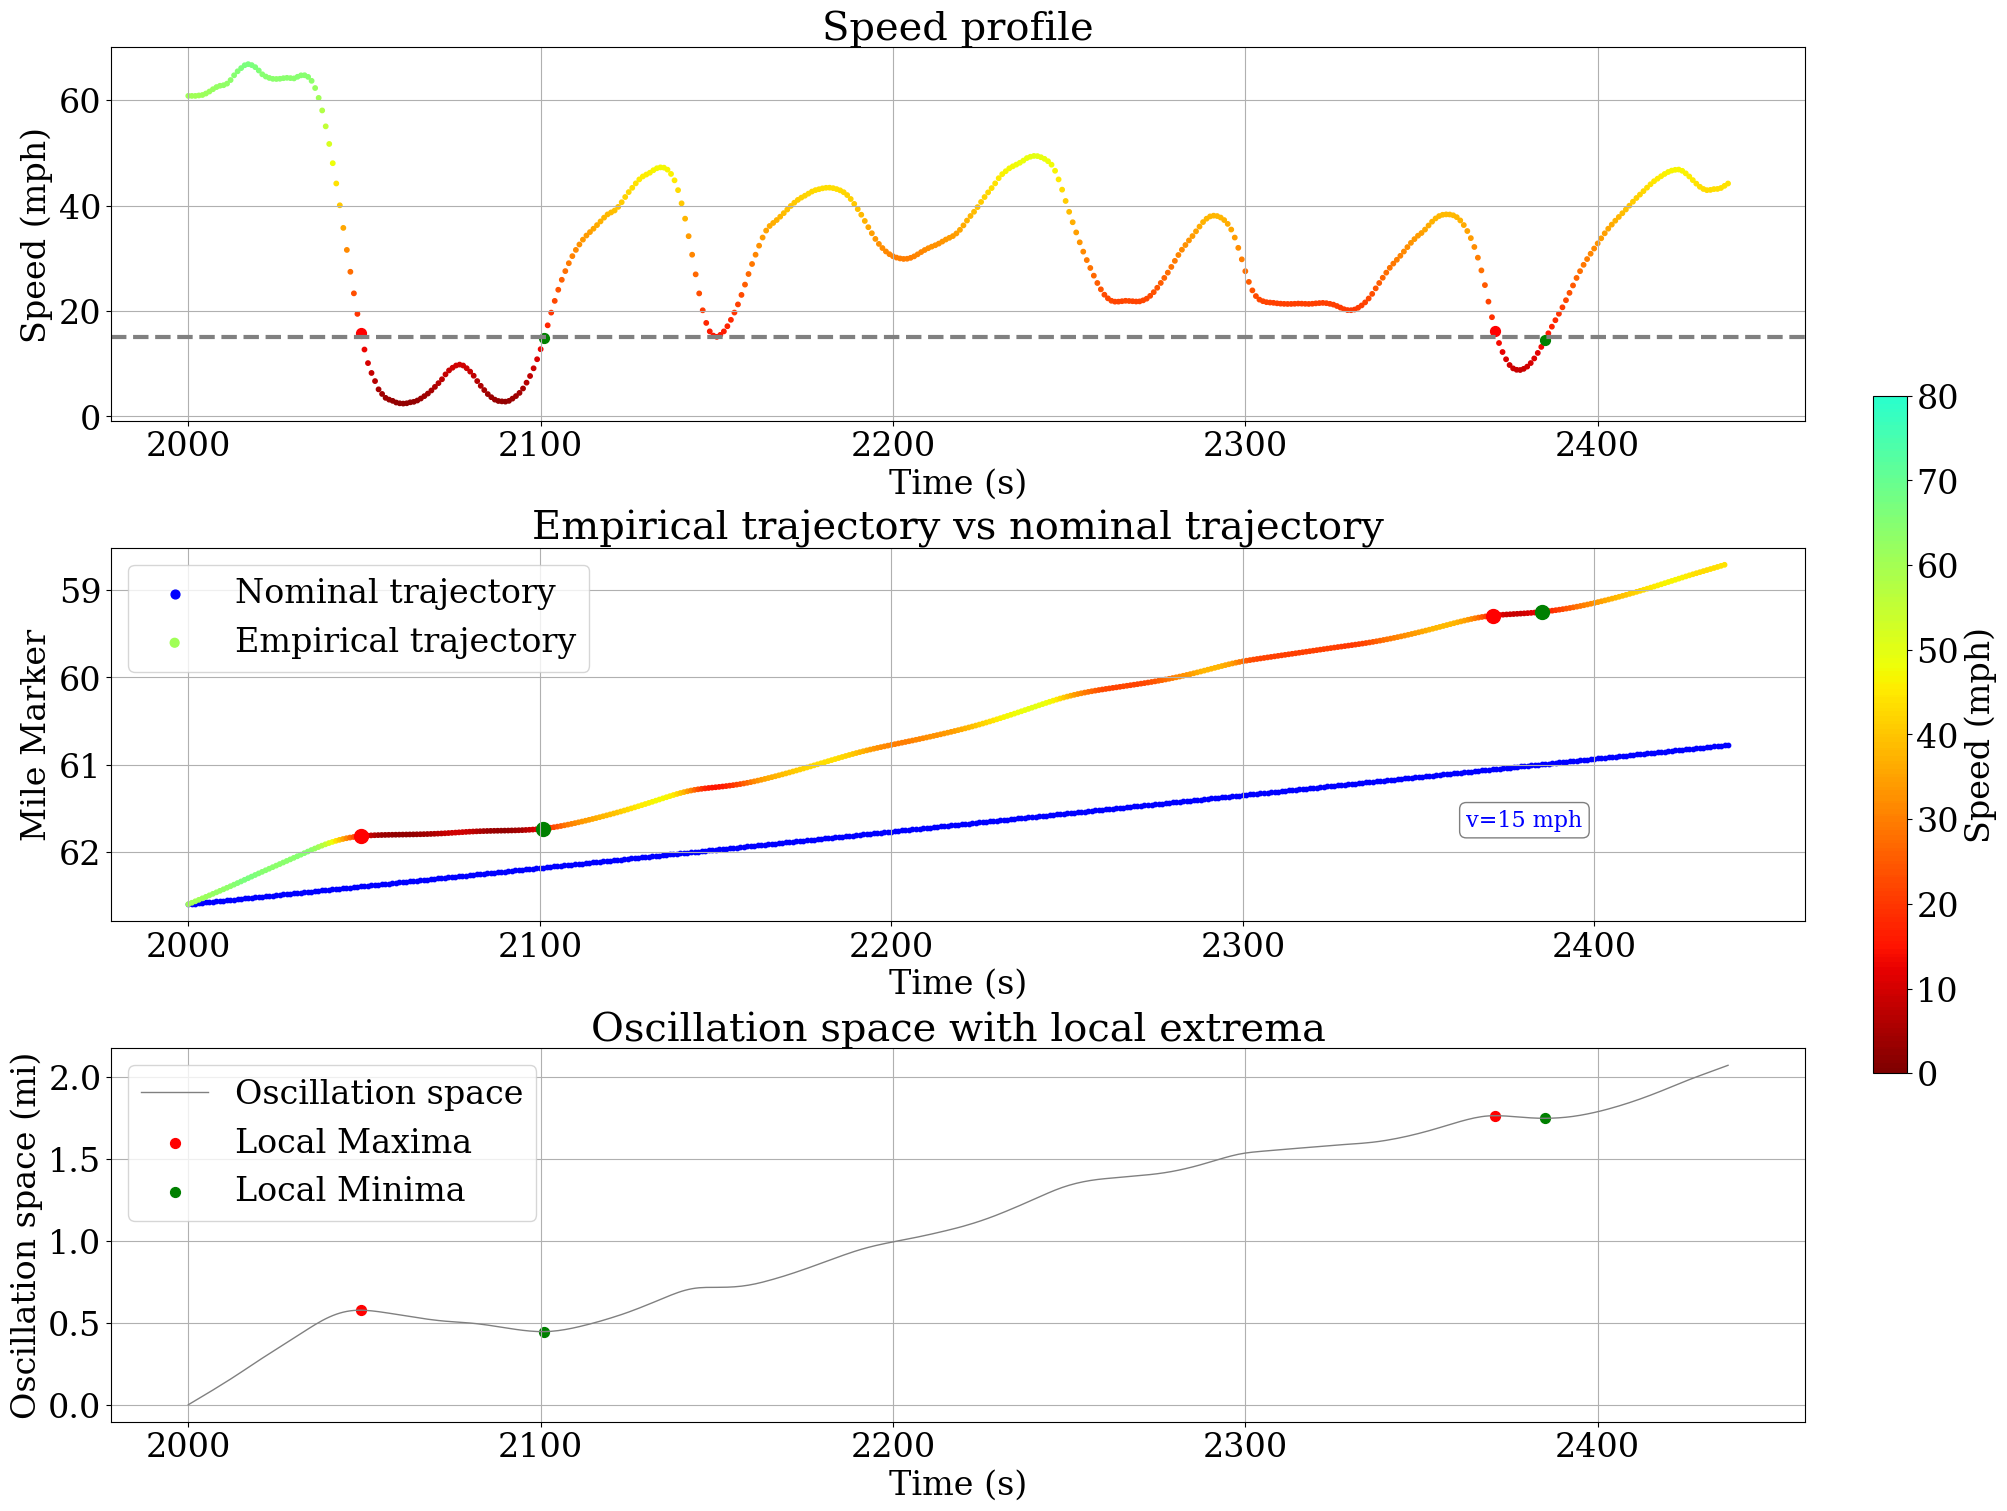

In [25]:
# make three figures with subplots
fig, axs = plt.subplots(3, 1, figsize=(20, 15), constrained_layout=True)
# first subplot
axs[0].scatter(vt_sample['time'], vt_sample['speed'], c=vt_sample['speed'], cmap=green_to_red, vmin=0, vmax = 80, s=10)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Speed (mph)')
# add a horizontal line at y=15
axs[0].axhline(y=15, color='grey', linestyle='--', lw =3, label='Fixed speed = 15 mph')
axs[0].scatter(vt_sample['time'].iloc[tail_peaks], vt_sample['speed'].iloc[tail_peaks], color='red',
               s=50)
axs[0].scatter(vt_sample['time'].iloc[front_peaks], vt_sample['speed'].iloc[front_peaks], color='green',
               s=50)
# axs[0].legend()
axs[0].set_title('Speed profile')
axs[0].grid(True)
# second subplot
axs[1].scatter(vt_sample['time'], vt_sample['nominal_space'], label='Nominal trajectory', s=10,
            color='blue')
axs[1].scatter(vt_sample['time'], vt_sample['space'], label='Empirical trajectory',
               c=vt_sample['speed'], cmap=green_to_red, vmin=0, vmax=80, s=10)
axs[1].scatter(vt_sample['time'].iloc[tail_peaks], vt_sample['space'].iloc[tail_peaks], color='red',
               s=100)
axs[1].scatter(vt_sample['time'].iloc[front_peaks], vt_sample['space'].iloc[front_peaks], color='green',
               s=100)

axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Mile Marker')
# add a text saying v=15 mph
axs[1].text(0.8, 0.3, 'v=15 mph', transform=axs[1].transAxes, fontsize=16, verticalalignment='top', 
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.5), color='blue')
axs[1].invert_yaxis()
axs[1].set_title('Empirical trajectory vs nominal trajectory')
axs[1].legend(markerscale=2)
axs[1].grid(True)
# third subplot
axs[2].plot(vt_sample['time'], vt_sample['oscillation_space'], 
            label='Oscillation space', color='grey', linewidth=1)
axs[2].scatter(vt_sample['time'].iloc[tail_peaks], vt_sample['oscillation_space'].iloc[tail_peaks], color='red',
               s=50, label='Local Maxima')
axs[2].scatter(vt_sample['time'].iloc[front_peaks], vt_sample['oscillation_space'].iloc[front_peaks], color='green',
               s=50, label='Local Minima')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Oscillation space (mi)')
axs[2].set_title('Oscillation space with local extrema')
axs[2].legend()
axs[2].grid(True)
# add color bar
sm = plt.cm.ScalarMappable(cmap=green_to_red, norm=plt.Normalize(vmin=0, vmax=80))
sm.set_array([])
cbar = fig.colorbar(sm, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Speed (mph)')
plt.savefig('../figures/vehicle_trajectory_decomposition.pdf', dpi=300, bbox_inches='tight')
plt.show()